In [28]:
import matplotlib.pyplot as plt  # 그림으로 보기 위한 matplotlib 라이브러리를 불러옵니다.
from tensorflow.keras.datasets import mnist  # 라이브러리가 기본으로 제공하는 mnist 데이터셋을 불러옵니다.
from tensorflow.keras.utils import to_categorical  # one-hot encoding 을 위한 함수
from tensorflow.keras.models import Sequential  # 레이어를 층층히 쌓아가는 연쇄 모델
from tensorflow.keras.layers import Dense  # 완전연결층
from tensorflow.keras.models import load_model  # 저장된 모델을 불러오기 위해 사용될 함수를 불러옵니다.
import numpy as np # 이미지 후 처리를 위한 numpy를 import 

X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


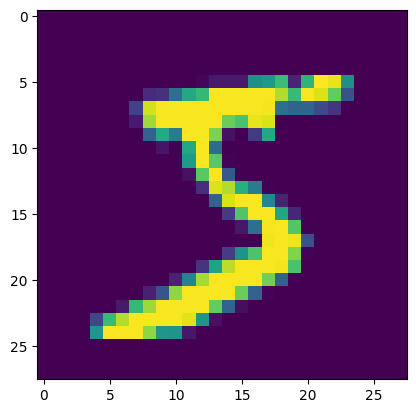

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # 표준 데이터인 MNiST dataset 다운로드

# 데이터셋 차원 확인
print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 28, 28)
print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000,)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 28, 28)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000,)

plt.imshow(X_train[0])
plt.show()

In [30]:
input_shape = X_train.shape[1] * X_train.shape[2]  # 그림의 크기: 28 * 28
number_of_classes = len(set(y_train))  # 레이블의 종류. 0~9로 10개

X_train = X_train / 255.0
X_test = X_test / 255
X_train = X_train.reshape(-1, input_shape)  # 3차원 -> 2차원
X_test = X_test.reshape(-1, input_shape)

print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 784)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 784)

X_train_shape: (60000, 784)
X_test_shape: (10000, 784)


In [31]:
y_train = to_categorical(y_train, number_of_classes)  # 원-핫 인코딩. 1차원 -> 2차원
y_test = to_categorical(y_test, number_of_classes)

print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000, 10)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000, 10)

y_train_shape: (60000, 10)
y_test_shape: (10000, 10)


In [32]:
model = Sequential()  # 모델 선언

In [33]:
# 완전연결층 추가. 처음 쌓는 레이어는 input_shape: 데이터 차원(개수 제외)을 적어줘야함.
# 128개의 뉴런을 세팅한다.
model.add(Dense(128, activation="relu", input_shape=X_train.shape[1:]))
# 출력하는 완전연결층 추가. 다중분류이므로, softmax 활성화함수 사용
# 
model.add(Dense(y_train.shape[1], activation="softmax"))

In [34]:
# 모델 컴파일. 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

model.summary()  # 간단하게 요약해 출력

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
loss, acc = model.evaluate(X_test, y_test)  # 학습 완료 후 검증
print("손실률:", loss)  # 현재딥러닝 모델의 손실률을 출력합니다.
print("정확도:", acc)  # 현재 딥러닝 모델의 정확도를 출력합니다.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8616 - loss: 0.4891 - val_acc: 0.9586 - val_loss: 0.1503
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - acc: 0.9616 - loss: 0.1307 - val_acc: 0.9661 - val_loss: 0.1158
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9739 - loss: 0.0902 - val_acc: 0.9693 - val_loss: 0.1004
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - acc: 0.9809 - loss: 0.0626 - val_acc: 0.9712 - val_loss: 0.0964
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - acc: 0.9862 - loss: 0.0460 - val_acc: 0.9754 - val_loss: 0.0862
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - acc: 0.9906 - loss: 0.0338 - val_acc: 0.9760 - val_loss: 0.0849
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - acc: 0.9921 - loss: 0.0277 - val_acc: 0.9745 - val_loss: 0.0919
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - acc: 0.9932 - loss: 0.0223 - val_acc: 0.9757 - val_loss: 0.0959
Epoch 9/10
1500/1500 ━━━━━━━

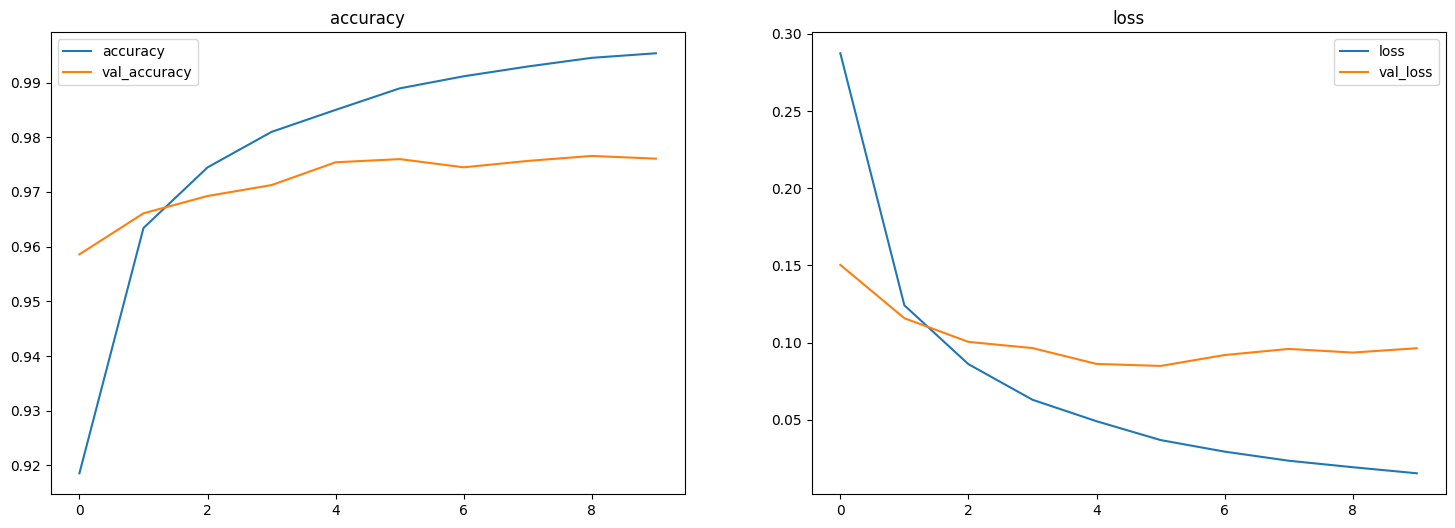

In [36]:
plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label="accuracy")
plt.plot(history.history["val_acc"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.savefig("Accuracy and Loss")
plt.show()

In [37]:
model.save("model.h5")
loaded_model = load_model("model.h5")

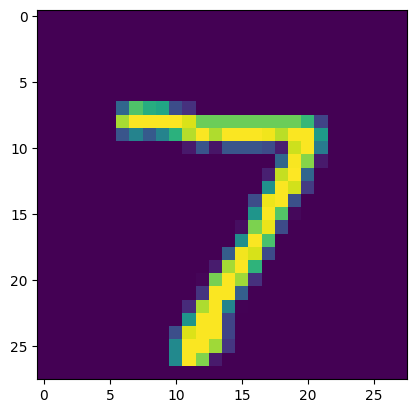

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
real: 7
predict: 7


In [38]:
plt.imshow(X_test[0].reshape(28, 28))  # 데이터 일자로 펴주기
plt.show()

# 첫 번째 테스트 이미지 표시

# 첫 번째 테스트 이미지에 대한 클래스 예측
pred_probs = loaded_model.predict(X_test[:1])  # 클래스 확률 예측
pred = np.argmax(pred_probs, axis=-1)[0]  # 가장 높은 확률을 가지는 클래스 선택

# 실제 클래스와 예측된 클래스 출력
print("real:", np.argmax(y_test[0]))  # 실제 클래스
print("predict:", pred)  # 예측된 클래스